<a href="https://colab.research.google.com/github/YB-Sung/DXIC_Lab_09_ML5_SVM-for-Classification/blob/main/SVM_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ LG전자 H&A DX Intensive Course - Support Vector Machine ]

SVM을 활용한 Classification

**진행 순서**
1. Dataset 생성
2. Dataset EDA
3. SVM 모델 생성
4. SVM 모델 학습 및 평가
5. SVM 하이퍼파라미터 튜닝 및 평가
6. Baseline 모델 학습 및 평가
7. 성능 비교

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# 1. Dataset 생성

## California 주택 가격 예측: [description](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

---
**Number of Instances:**  
20640

**Number of Attributes:**  
8 numeric, predictive attributes and the target

**Attribute Information:**  
- MedInc median income in block group
- HouseAge median house age in block group
- AveRooms average number of rooms per household
- AveBedrms average number of bedrooms per household
- Population block group population
- AveOccup average number of household members
- Latitude block group latitude
- Longitude block group longitude

**Missing Attribute Values:**  
None


---
**데이터 설명**  
목표 변수는 캘리포니아 지역의 주택 중간값으로, 단위는 $100,000 입니다.

이 데이터는 1990년 U.S. census를 통해 수집되었으며, 관측치는 하나의 block 단위를 나타냅니다. Block은 U.S. census에서 표본 데이터를 나타내는 가장 작은 지리적 단위입니다(block group은 일반적으로 600~3,000명의 인구를 포함합니다).

가구는 한 주택 내에 거주하는 사람들의 그룹입니다. 이 데이터 집합의 AveRooms과 AveBedrms는 가구 당 제공되므로 휴양지와 같이 가구 수가 적고 빈집이 많은 경우 이 열의 값이 클 수 있습니다.

In [ ]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

print('Trainset: ',X_train.shape)
print('Testset: ',X_test.shape)

Trainset:  (14448, 8)
Testset:  (6192, 8)


# 2. Dataset EDA

In [ ]:
# Convert X_train and y_train to pandas DataFrames
X_train_df = pd.DataFrame(X_train, columns=housing.feature_names)
y_train_df = pd.DataFrame(y_train, columns=["Target"])
train_df = pd.concat([X_train_df, y_train_df], axis=1)

In [ ]:
# Print basic statistics of X_train_df
print("trainset statistics:")
train_df.describe()

trainset statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.876892,28.575374,5.438125,1.098033,1427.927326,3.119236,35.650669,-119.584102,2.069240
std,1.904908,12.613634,2.453569,0.447498,1140.225190,12.373636,2.135742,2.002930,1.157492
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.567225,18.000000,4.448928,1.006783,791.000000,2.430380,33.940000,-121.800000,1.193000
50%,3.539100,29.000000,5.232422,1.049492,1168.000000,2.817147,34.270000,-118.510000,1.793000
75%,4.758075,37.000000,6.060692,1.100328,1727.000000,3.279135,37.720000,-118.010000,2.646000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


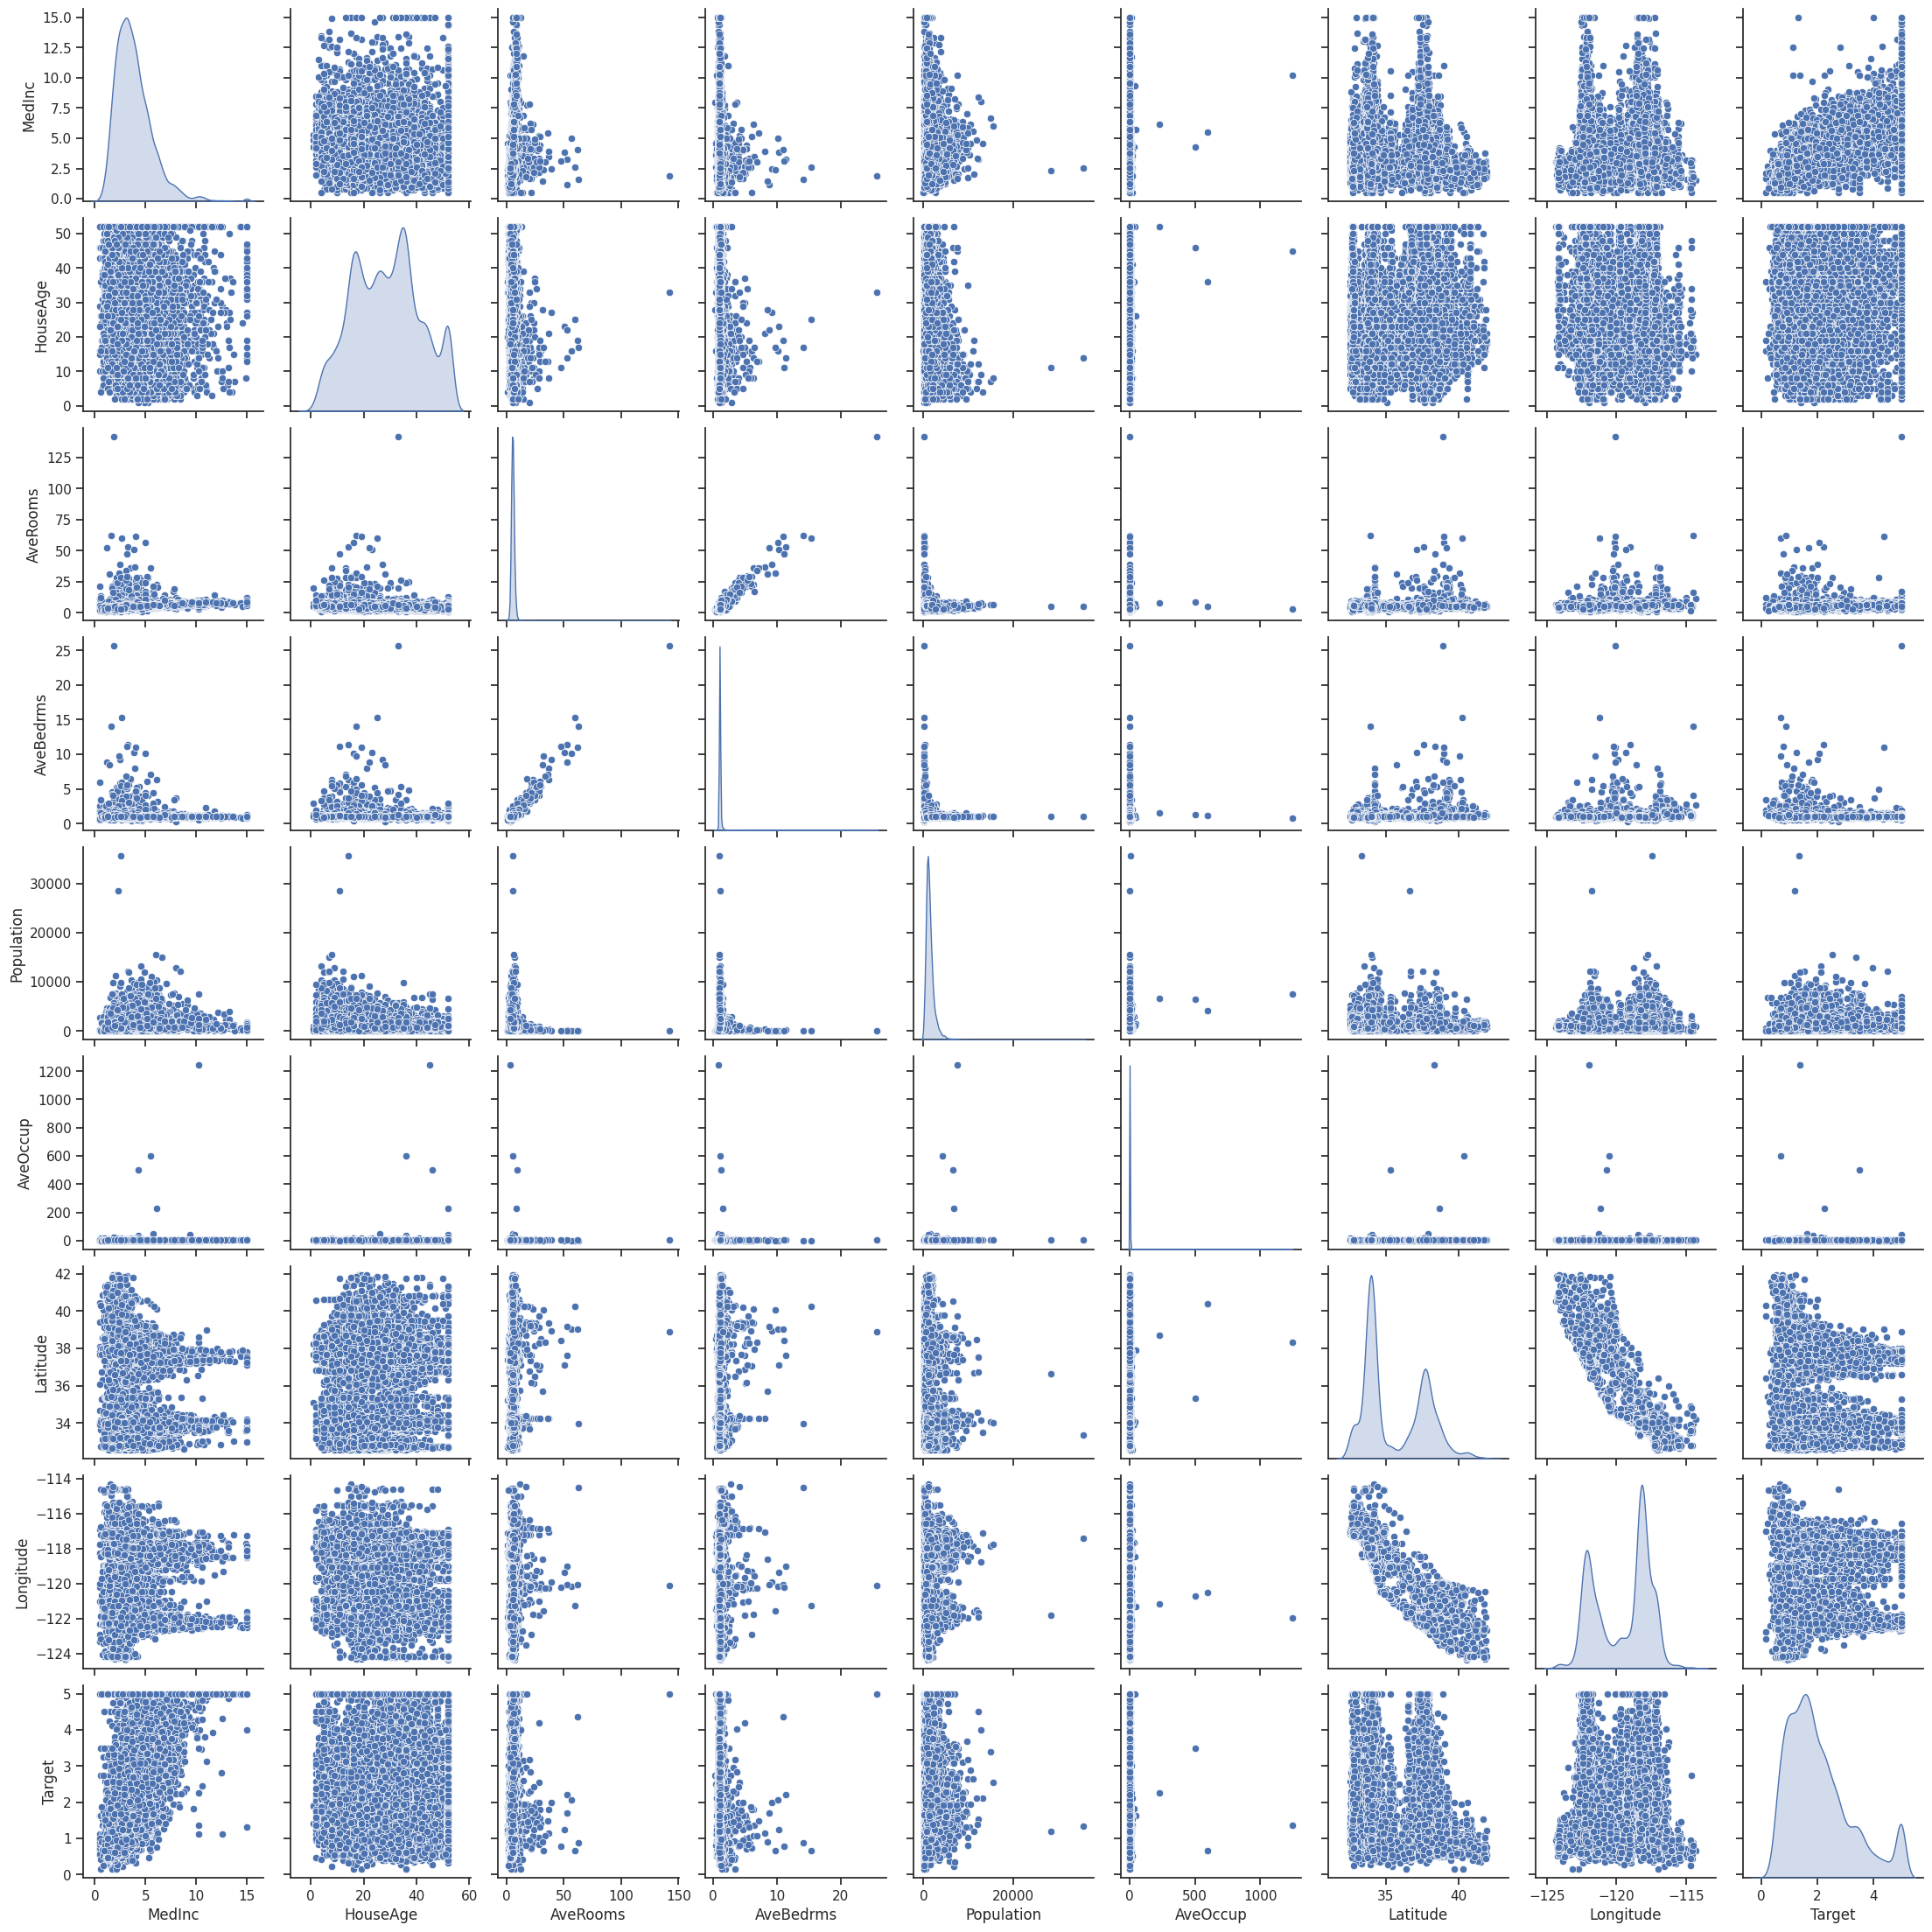

In [ ]:
sns.pairplot(train_df, diag_kind='kde')
plt.show()

![image](https://github.com/TooTouch/MemSeg/assets/37654013/4ef05318-fed7-4baf-9d8c-3aff82abc404)

<Axes: xlabel='Longitude', ylabel='Latitude'>

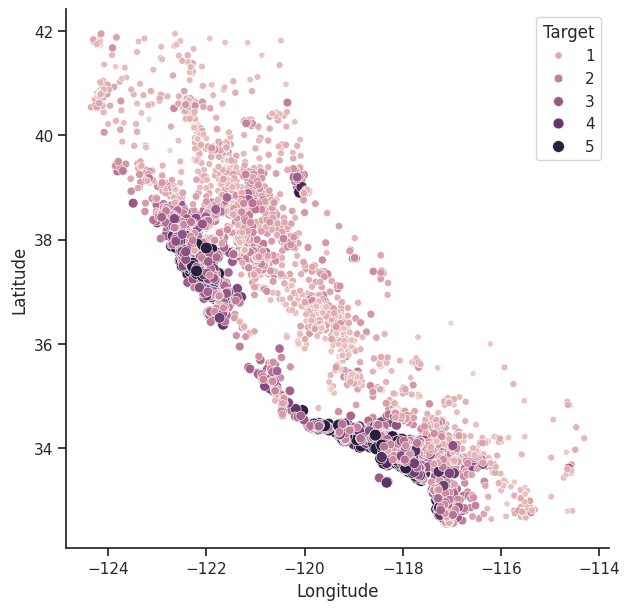

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Longitude', y='Latitude', hue='Target', size='Target', data=train_df)

<Axes: >

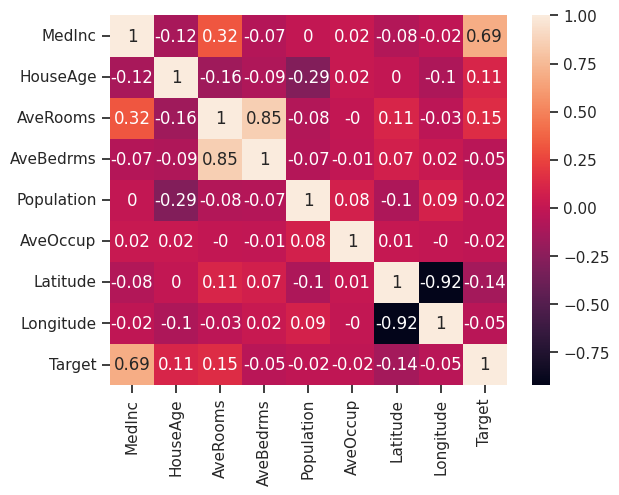

In [ ]:
# Visualize correlation matrix of X_train_df
sns.heatmap(np.round(train_df.corr(), 2), annot=True)

# 3. SVM 모델 생성

In [ ]:
# Create a Support Vector Regressor
model = SVR()

# 4. SVM 모델 학습 및 평가

In [ ]:
model.fit(X_train, y_train)

SVR()

## 4.1 모델 평가

**사용 평가 지표**
1. RMSE $\sqrt{\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2}$

2. MAE $\frac{1}{N} \sum_{i=1}^{N}|y_i - \hat{y}_i|$

3. MAPE $\frac{1}{N} \sum_{i=1}^{N}|\frac{y_i - \hat{y}_i}{y_i}|$



In [ ]:
def calc_metrics(y_true: np.ndarray, y_pred: np.ndarray):
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  mae = mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)

  return {
      "RMSE" : rmse,
      "MAE"  : mae,
      "MAPE" : mape,
  }

In [ ]:
# Evaluate the trained SVR model on the test set
y_pred = model.predict(X_test)

# Calculate and print various evaluation metrics
print('Default SVR: ')
svm_metrics = calc_metrics(y_true=y_test, y_pred=y_pred)
for k, v in svm_metrics.items():
    print(f'{k:10s}: {v:.4f}')

Default SVR: 
RMSE      : 1.1615
MAE       : 0.8665
MAPE      : 0.5197


# 5. SVM 모델 하이퍼파라미터 튜닝 및 평가


SVC hyper-parameters: [sklearn's documentation - SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

GridSearchCV: [sklearn's documentation - GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

RandomizedSearchCV: [sklearn's documentation - RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

![search](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbbiSBu%2FbtqF3T0FGSi%2FvnJ5vH9oANNJL2SFdZTrA0%2Fimg.png)

## Cross Validation


<p align="center">
  <img width="500" src="https://scikit-learn.org/stable/_images/grid_search_workflow.png">
  <br><strong>Cross validation workflow in model training.</strong></br>
  <br>
</p>

<p align="center">
  <img width="700" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">
  <br><strong>k-fold cross validation.</strong></br>
</p>

In [ ]:
# Define a dictionary of hyperparameters to tune
param_grid = {
    'C'      : [0.1, 0, 1, 5, 10],
    'gamma'  : [0.1, 0.001],
    'kernel' : ['rbf']
}


# Create a GridSearchCV instance
model = SVR()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0, 1, 5, 10], 'gamma': [0.1, 0.001],
                         'kernel': ['rbf']},
             scoring='neg_mean_absolute_error')

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([1.37077391e+01, 1.62273685e+01, 9.63830948e-04, 1.01547241e-03,
        3.73804385e+01, 1.57977189e+01, 6.27126434e+01, 1.99753609e+01,
        6.33538742e+01, 2.72067581e+01]),
 'std_fit_time': array([1.46323819e-01, 4.13271357e-01, 4.66944111e-05, 9.11581706e-05,
        4.99186000e-01, 1.96914961e-01, 5.71621419e-01, 5.69358952e-01,
        7.03128900e-01, 9.13265504e-01]),
 'mean_score_time': array([4.56257029, 4.38885746, 0.        , 0.        , 4.7625433 ,
        4.40643454, 4.06220856, 4.39737659, 5.4682034 , 3.70645018]),
 'std_score_time': array([0.38902058, 0.58347176, 0.        , 0.        , 0.4468532 ,
        0.64341984, 0.12970012, 0.53755339, 0.0932518 , 1.02007211]),
 'param_C': masked_array(data=[0.1, 0.1, 0, 0, 1, 1, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.1, 0.001, 0.1,

In [ ]:
# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Create a DataFrame to store the results
df_results = pd.DataFrame(results)

# Select the relevant columns
df_results = df_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Rename the columns
df_results.columns = ['Hyper-parameters', 'Mean Test Score', 'Standard deviation', 'Rank']

# Print the DataFrame
df_results

,Hyper-parameters,Mean Test Score,Standard deviation,Rank
0,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",-0.871673,0.014764,8
1,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",-0.832404,0.013328,5
2,"{'C': 0, 'gamma': 0.1, 'kernel': 'rbf'}",NaN,NaN,9
3,"{'C': 0, 'gamma': 0.001, 'kernel': 'rbf'}",NaN,NaN,9
4,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",-0.824839,0.010750,4
5,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",-0.645343,0.007775,3
6,"{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}",-0.840345,0.009824,6
7,"{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}",-0.549027,0.005532,2
8,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",-0.840938,0.009955,7
9,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",-0.532037,0.007001,1


In [ ]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print various evaluation metrics
print('Tuned SVR: ')
best_svm_metrics = calc_metrics(y_true=y_test, y_pred=y_pred)
for k, v in best_svm_metrics.items():
    print(f'{k:10s}: {v:.4f}')

Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Tuned SVR: 
RMSE      : 0.7270
MAE       : 0.5201
MAPE      : 0.2965


# 6. Baseline 모델 학습 및 평가

**Baseline models**
1. Linear Regression

In [ ]:
# Create Linear Regression
linreg_model = LinearRegression()

# Train Linear Regression on the training set
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the trained Linear Regression and Decision Tree models on the test set

# Linear Regression
y_pred_linreg = linreg_model.predict(X_test)

# Calculate and print various evaluation metrics
print('Linear Regression:')
linreg_metrics = calc_metrics(y_true=y_test, y_pred=y_pred_linreg)
for k, v in linreg_metrics.items():
    print(f'{k:10s}: {v:.4f}')

Linear Regression:
RMSE      : 0.7284
MAE       : 0.5272
MAPE      : 0.3175


# 7. 성능 비교

In [ ]:
results = defaultdict(list)

results['Model'] = ['Linear Regression', 'SVM', 'SVM(tuned)']
exp_metrics = [linreg_metrics, svm_metrics, best_svm_metrics]
for metrics in exp_metrics:
    for k, v in metrics.items():
        results[k].append(v)

table = pd.DataFrame(results)
table

,Model,RMSE,MAE,MAPE
0,Linear Regression,0.728401,0.527247,0.317503
1,SVM,1.161463,0.866498,0.519665
2,SVM(tuned),0.727045,0.520058,0.296498
